In [240]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [241]:
file = '/Users/brendan/Desktop/Python/BoostedAI/quarterly_data/AVGO.csv'

In [242]:
df = pd.read_csv(file)
#df['Quarter'].value_counts() --> 13 for AVGO
df = df.rename({'Unnamed: 0':'Date'}, axis=1)
df.head()

,Date,Calendar_Year,Quarter,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,outstandingShares,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,Cash,Receivables,Inventory,Cur Assets,Tax Assets,LT Assets,Int Assets,Total Assets,Payables,Deferred Revenue Current,Deferred Revenue LongTerm,Cur Liab,LT Debt,LT Liab,Total Liab,SH Equity,cash_flow Operations,cash_flow Investing,cash_flow Financing,CAPEX,Fcash_flow,Dividends Paid,Gross Profit Margin,Op Margin,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price To FCF,PEG,EPS,Ticker
0,2022-06-25,2022,Q2,"235,150.80",1.87,0.71,19.86,6.35,424.00,"8,103.00","5,439.00","1,261.00","2,045.00","3,394.00","2,590.00","9,005.00","3,083.00","1,668.00","14,810.00",0.00,"56,909.00","9,241.00","71,719.00","1,069.00",0.00,0.00,"6,910.00","39,164.00","43,819.00","50,729.00","20,963.00","4,243.00",-310.00,"-5,147.00",-85.00,"4,158.00","-1,750.00",0.67,0.42,6.55,0.32,0.01,2.14,90.59,36.11,54.48,0.04,0.12,0.05,22.70,29.02,11.22,56.55,2.49,6.35,AVGO
1,2022-03-26,2022,Q1,"241,382.56",1.71,0.69,18.70,6.00,429.00,"7,706.00","5,049.00","1,206.00","1,924.00","3,108.00","2,472.00","10,219.00","2,539.00","1,520.00","15,341.00",0.00,"57,883.00","10,244.00","73,224.00","1,078.00","3,027.00",0.00,"6,287.00","39,205.00","43,943.00","50,230.00","22,994.00","3,486.00",-309.00,"-5,121.00",-101.00,"3,385.00","-1,764.00",0.66,0.40,7.64,0.32,0.01,2.44,81.14,36.51,44.63,0.03,0.11,0.05,24.41,31.32,10.50,71.31,0.97,5.82,AVGO
2,2021-12-25,2021,Q4,"217,556.60",1.58,0.67,17.98,4.83,430.00,"7,407.00","4,638.00","1,200.00","2,031.00","2,581.00","1,989.00","12,163.00","2,071.00","1,297.00","16,586.00",0.00,"58,984.00","11,374.00","75,570.00","1,086.00","2,619.00",566.00,"6,281.00","39,440.00","44,300.00","50,581.00","24,989.00","3,541.00",50.00,"-2,533.00",-88.00,"3,453.00","-1,561.00",0.63,0.35,5.95,0.27,0.01,2.64,67.32,35.30,32.02,0.03,0.08,0.04,27.34,29.37,8.71,63.01,4.44,4.65,AVGO
3,2021-09-25,2021,Q3,"199,203.48",1.65,0.68,16.49,4.56,429.00,"6,778.00","4,197.00","1,205.00","2,045.00","2,126.00","1,876.00","11,105.00","2,234.00","1,160.00","15,636.00",0.00,"60,244.00","12,719.00","75,880.00",968.00,"3,008.00",620.00,"6,501.00","40,178.00","45,012.00","51,513.00","24,367.00","3,541.00",-47.00,"-1,907.00",-115.00,"3,426.00","-1,556.00",0.62,0.31,5.12,0.28,0.01,2.41,70.11,33.75,36.36,0.02,0.08,0.03,26.55,29.39,8.18,58.14,1.00,4.38,AVGO
4,2021-06-26,2021,Q2,"184,107.27",1.68,0.68,16.16,3.65,429.00,"6,610.00","4,057.00","1,238.00","2,057.00","1,975.00","1,493.00","9,518.00","2,425.00","1,004.00","14,245.00",0.00,"61,279.00","14,068.00","75,524.00",830.00,"3,409.00",688.00,"6,436.00","40,160.00","45,122.00","51,558.00","23,966.00","3,569.00",-126.00,"-3,477.00",-126.00,"3,443.00","-1,552.00",0.61,0.30,4.24,0.23,0.01,2.21,68.41,29.26,39.15,0.02,0.06,0.03,30.83,27.85,7.68,53.47,3.79,3.46,AVGO


In [243]:
len(df)

52

In [244]:
def common_size(ticker):
    df = pd.read_csv(f'/Users/brendan/Desktop/Python/BoostedAI/quarterly_data/{ticker}.csv')
    #df = df[::-1]
    df = df.rename({'Unnamed: 0':'Date'}, axis=1)
    #df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Gross Margin %'] = df['Gross Profit']/df['Revenue'] * 100
    df['R&D % Rev'] = df['R&D Expenses']/df['Revenue'] * 100
    df['Op Expenses % Rev'] = df['Op Expenses'] / df['Revenue'] * 100
    df['EBIT Margin %'] = df['Op Income'] / df['Revenue'] * 100
    df['Net Margin %'] = df['Net Income'] / df['Revenue'] * 100
    df['OCF Margin %'] = df['cash_flow Operations'] / df['Revenue'] * 100
    df['FCF Margin %'] = df['Fcash_flow']/df['Revenue'] * 100
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df[['Date','Calendar_Year', 'Quarter', 'Mkt Cap','Revenue','Gross Margin %',
              'R&D % Rev', 'Op Expenses % Rev', 'EBIT Margin %','Net Margin %',
              'OCF Margin %','FCF Margin %']]

In [245]:
AVGO_df = common_size('AVGO')
#AVGO_df['Date'] = pd.to_datetime(df['Date'])
AVGO_df.head()

,Date,Calendar_Year,Quarter,Mkt Cap,Revenue,Gross Margin %,R&D % Rev,Op Expenses % Rev,EBIT Margin %,Net Margin %,OCF Margin %,FCF Margin %
0,2022-06-25,2022,Q2,"235,150.80","8,103.00",67.12,15.56,25.24,41.89,31.96,52.36,51.31
1,2022-03-26,2022,Q1,"241,382.56","7,706.00",65.52,15.65,24.97,40.33,32.08,45.24,43.93
2,2021-12-25,2021,Q4,"217,556.60","7,407.00",62.62,16.20,27.42,34.85,26.85,47.81,46.62
3,2021-09-25,2021,Q3,"199,203.48","6,778.00",61.92,17.78,30.17,31.37,27.68,52.24,50.55
4,2021-06-26,2021,Q2,"184,107.27","6,610.00",61.38,18.73,31.12,29.88,22.59,53.99,52.09


In [246]:
AVGO_df['Rev % YoY'] = ((-AVGO_df.groupby('Quarter')[['Revenue']].diff()['Revenue']).shift(-4).fillna(0))/AVGO_df['Revenue']*100
AVGO_df['GM % bps YoY'] = ((-AVGO_df.groupby('Quarter')[['Gross Margin %']].diff()['Gross Margin %']).shift(-4).fillna(0))*100
AVGO_df['EBIT % bps YoY'] = ((-AVGO_df.groupby('Quarter')[['EBIT Margin %']].diff()['EBIT Margin %']).shift(-4).fillna(0))*100
AVGO_df['Net Margin % bps YoY'] = ((-AVGO_df.groupby('Quarter')[['Net Margin %']].diff()['Net Margin %']).shift(-4).fillna(0))*100


In [247]:
AVGO_df_plot = AVGO_df[['Date', 'Calendar_Year', 'Quarter','Rev % YoY','GM % bps YoY','EBIT % bps YoY']].set_index(['Date'])
AVGO_df_plot = AVGO_df_plot[::-1]
AVGO_df_plot = AVGO_df_plot[4:]
AVGO_df_plot  = AVGO_df_plot.round({'Rev % YoY':1})

AVGO_df_plot.head()

,Calendar_Year,Quarter,Rev % YoY,GM % bps YoY,EBIT % bps YoY
Date,,,,,
2010-09-25,2010,Q3,34.00,897.52,"1,793.39"
2010-12-25,2010,Q4,25.20,666.30,"2,418.14"
2011-03-26,2011,Q1,17.10,672.89,871.29
2011-06-25,2011,Q2,8.00,386.44,367.20
2011-09-24,2011,Q3,8.80,143.55,-49.90


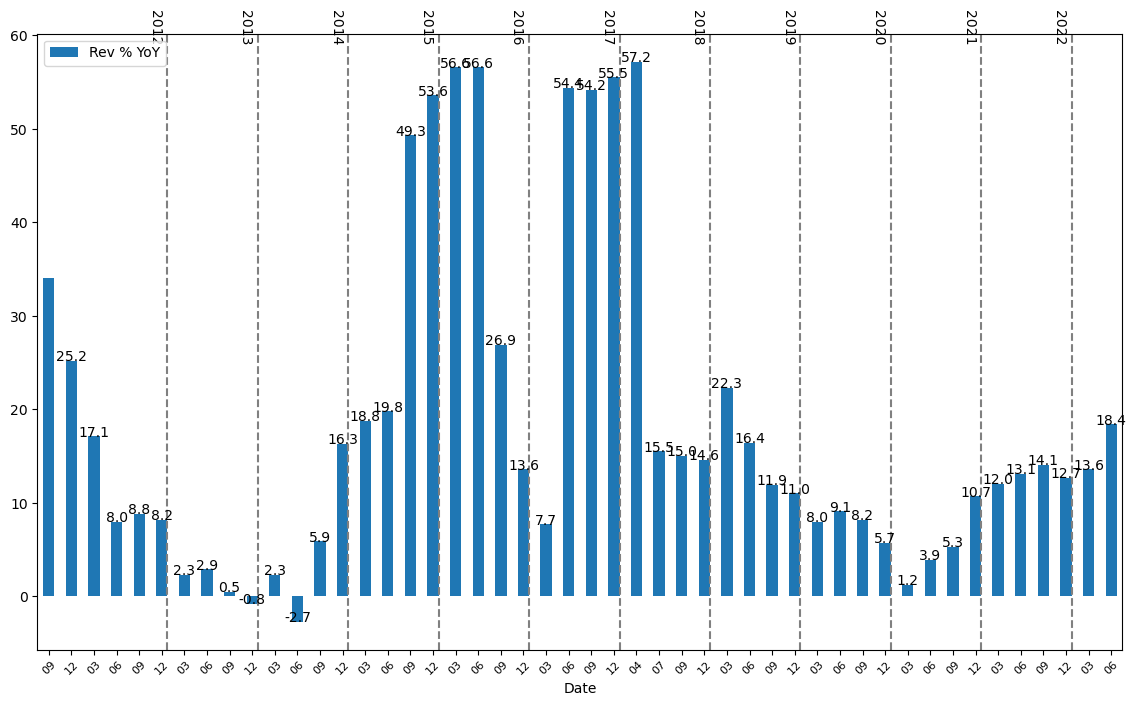

In [261]:

# plot
fig, ax = plt.subplots()
AVGO_df_plot.plot(kind='bar', y='Rev % YoY', figsize=(14,8), ax=ax)
ax.set_xticklabels([x.strftime("%m") for x in AVGO_df_plot.index], rotation=45)
ax.tick_params(axis='x', which='major', labelsize=8)


def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha="center")
x_list = list(AVGO_df_plot.index.values) 
y_list = AVGO_df_plot['Rev % YoY']
        
add_value_label(x_list, y_list)

######## Vline

# 2011
ax.axvline(x=5.25,ls='--',label='2012',color='grey') 
x_bounds = ax.get_xlim()
vline_value = 5
ax.annotate(text='2012', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

# 2012
ax.axvline(x=9.25,ls='--',label='2013',color='grey') 
x_bounds = ax.get_xlim()
vline_value=9
ax.annotate(text='2013', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)


# 2013
ax.axvline(x=13.25,ls='--',label='2014',color='grey') 
x_bounds = ax.get_xlim()
vline_value=13
ax.annotate(text='2014', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

# 2014
ax.axvline(x=17.25,ls='--',label='2015',color='grey') 
x_bounds = ax.get_xlim()
vline_value=17
ax.annotate(text='2015', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

# 2015
#
ax.axvline(x=21.25,ls='--',label='2016', color='grey') 
x_bounds = ax.get_xlim()
vline_value=21
ax.annotate(text='2016', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

#2016

#
ax.axvline(x=25.25,ls='--',label='2017',color='grey') 
x_bounds = ax.get_xlim()
vline_value=25
ax.annotate(text='2017', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

#2017
#
ax.axvline(x=29.25,ls='--',label='2018',color='grey')
x_bounds = ax.get_xlim()
vline_value=29
ax.annotate(text='2018', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)


#2018
#
ax.axvline(x=33.25,ls='--',label='2019',color='grey') 
x_bounds = ax.get_xlim()
vline_value=33
ax.annotate(text='2019', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

#2019
#
ax.axvline(x=37.25,ls='--',label='2020',color='grey') 
x_bounds = ax.get_xlim()
vline_value=37
ax.annotate(text='2020', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

#2020
#
ax.axvline(x=41.25,ls='--',label='2021',color='grey') 
x_bounds = ax.get_xlim()
vline_value=41
ax.annotate(text='2021', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

#2021
#
ax.axvline(x=45.25,ls='--',label='2022',color='grey') 
x_bounds = ax.get_xlim()
vline_value=45
ax.annotate(text='2022', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 270)

#plt.axvline(x=6,ls='--',label='2011')
#plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()


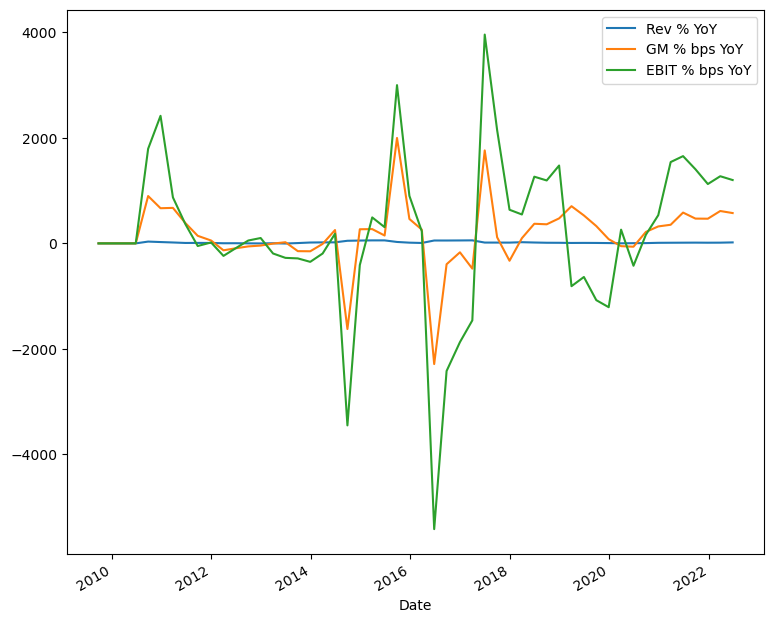

In [249]:
AVGO_df.plot(x="Date", y=["Rev % YoY", "GM % bps YoY", "EBIT % bps YoY"], kind="line", figsize=(9, 8))
plt.show()

## Plotting

In [250]:
x = AVGO_df['Date']
y = AVGO_df['OCF Margin %']
y1 = AVGO_df['FCF Margin %']

y2 = AVGO_df['Gross Margin %'].rolling(4).mean().fillna(method='ffill')
y3 = AVGO_df['EBIT Margin %'].rolling(4).mean().fillna(method='ffill')
y4 = AVGO_df['Net Margin %'].rolling(4).mean().fillna(method='ffill')

y5 = AVGO_df['OCF Margin %'].rolling(4).mean().fillna(method='ffill')
y6 = AVGO_df['FCF Margin %'].rolling(4).mean().fillna(method='ffill')

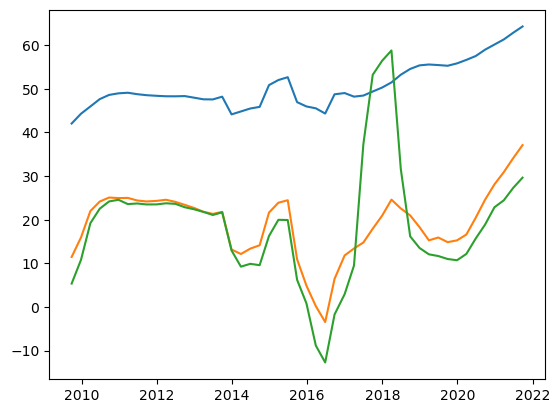

In [251]:
#plt.plot(x, y3)
#plt.plot(x, y4)

plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.show()

## MSFT

In [252]:
MSFT_df = common_size('MSFT')
MSFT_df['Date'] = pd.to_datetime(df['Date'])
MSFT_df.head()

,Date,Calendar_Year,Quarter,Mkt Cap,Revenue,Gross Margin %,R&D % Rev,Op Expenses % Rev,EBIT Margin %,Net Margin %,OCF Margin %,FCF Margin %
0,2022-06-25,2022,Q4,"1,919,547.42","51,865.00",68.32,13.21,28.73,39.59,32.28,47.49,34.24
1,2022-03-26,2022,Q3,"2,310,166.81","49,360.00",68.37,12.78,27.11,41.26,33.89,51.43,40.61
2,2021-12-25,2022,Q2,"2,524,081.65","51,728.00",67.21,11.13,24.21,43.01,36.28,27.99,16.65
3,2021-09-25,2022,Q1,"2,118,065.06","45,317.00",69.89,12.36,25.23,44.66,45.25,54.15,41.33
4,2021-06-26,2021,Q4,"2,039,064.25","46,152.00",69.68,12.32,28.31,41.37,35.66,49.21,35.23


In [253]:
x = MSFT_df['Date']
y = MSFT_df['OCF Margin %']
y1 = MSFT_df['FCF Margin %']

y2 = MSFT_df['Gross Margin %'].rolling(4).mean().fillna(method='ffill')
y3 = MSFT_df['EBIT Margin %'].rolling(4).mean().fillna(method='ffill')
y4 = MSFT_df['Net Margin %'].rolling(4).mean().fillna(method='ffill')

y5 = MSFT_df['OCF Margin %'].rolling(4).mean().fillna(method='ffill')
y6 = MSFT_df['FCF Margin %'].rolling(4).mean().fillna(method='ffill')

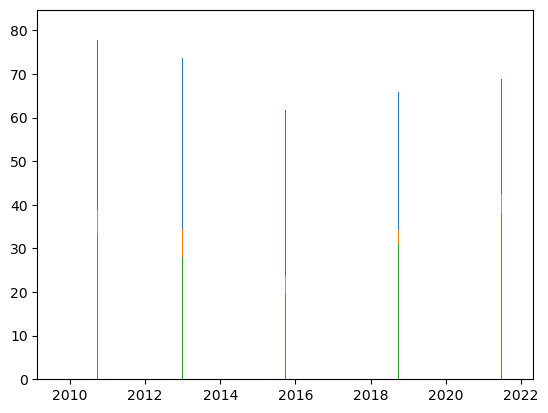

In [254]:
plt.bar(x, y2, label='Gross Margin %')
plt.bar(x, y3, label='EBIT Margin %')
plt.bar(x, y4, label='Net Margin %')
plt.show()